In [454]:
# To store data
import pandas as pd

# To do linear algebra
import numpy as np

# To create plots
import matplotlib.pyplot as plt

# To create nicer plots
import seaborn as sns; sns.set()

# To get new datatypes and functions
from collections import Counter
from scipy.stats import norm

# To build models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [455]:
#Loading data
df = pd.read_csv('/Users/saurabh/Documents/PythonData/sample.csv')

In [456]:
df.head(15)

,recommendation_id,created_at,tasker_id,position,hourly_rate,num_completed_tasks,hired,category
0,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1009185352,1,38,151,0,Furniture Assembly
1,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1006892359,2,40,193,0,Furniture Assembly
2,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1012023956,3,28,0,0,Furniture Assembly
3,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1009733517,4,43,303,0,Furniture Assembly
4,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1013579273,5,29,39,0,Furniture Assembly
5,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1012043028,6,28,2,0,Furniture Assembly
6,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1013470741,7,29,9,0,Furniture Assembly
7,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1009557645,8,29,8,0,Furniture Assembly
8,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1010800768,9,28,0,0,Furniture Assembly
9,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1009072269,10,35,59,0,Furniture Assembly


In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
recommendation_id      30000 non-null object
created_at             30000 non-null object
tasker_id              30000 non-null int64
position               30000 non-null int64
hourly_rate            30000 non-null int64
num_completed_tasks    30000 non-null int64
hired                  30000 non-null int64
category               30000 non-null object
dtypes: int64(5), object(3)
memory usage: 1.8+ MB


Data looks clean as no null values in any of the data columns

In [458]:
df.describe()

,tasker_id,position,hourly_rate,num_completed_tasks,hired
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.011072e+09,7.873600,57.482533,221.235700,0.056833
std,2.501822e+06,4.319442,36.222860,279.801812,0.231528
min,1.006647e+09,1.000000,18.000000,0.000000,0.000000
25%,1.008955e+09,4.000000,38.000000,23.000000,0.000000
50%,1.010579e+09,8.000000,45.000000,114.000000,0.000000
75%,1.013444e+09,12.000000,60.000000,300.250000,0.000000
max,1.015020e+09,15.000000,290.000000,1406.000000,1.000000


In [459]:
print('Shape df:\t{}'.format(df.shape))

Shape df:	(30000, 8)


### Data Exploration and Visualization

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


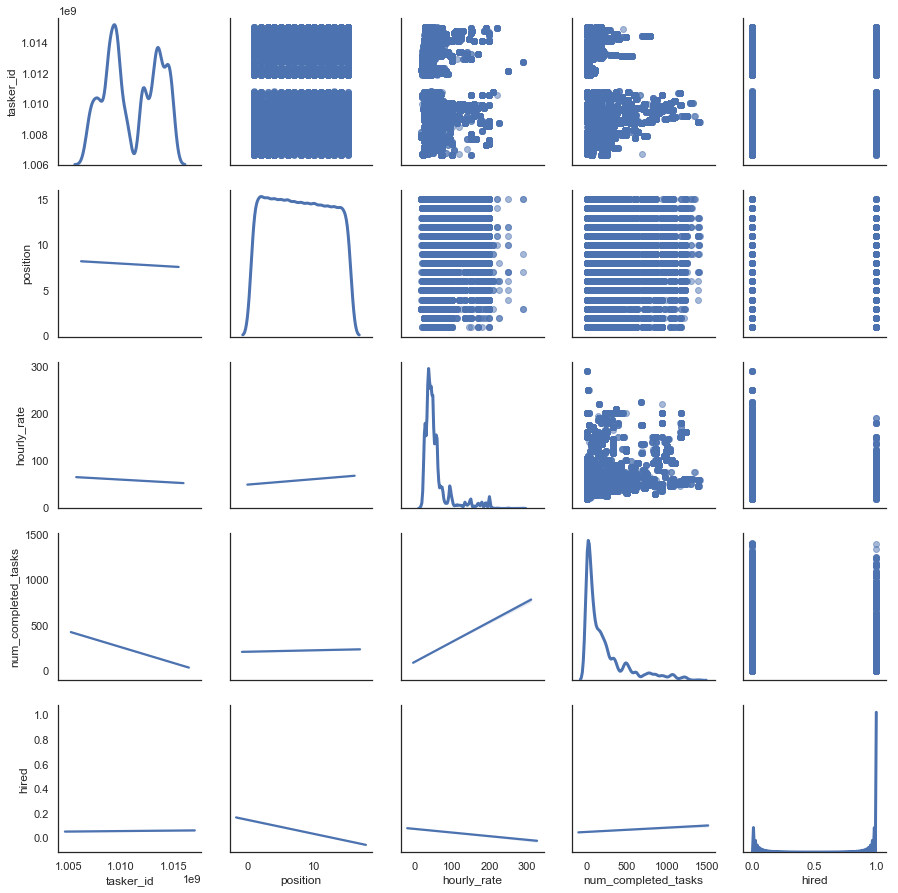

In [460]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                     tasker_id  position  hourly_rate  num_completed_tasks  \
tasker_id             1.000000 -0.039069    -0.086698            -0.313843   
position             -0.039069  1.000000     0.140029             0.024309   
hourly_rate          -0.086698  0.140029     1.000000             0.287258   
num_completed_tasks  -0.313843  0.024309     0.287258             1.000000   
hired                 0.008412 -0.213608    -0.046519             0.041825   

                        hired  
tasker_id            0.008412  
position            -0.213608  
hourly_rate         -0.046519  
num_completed_tasks  0.041825  
hired                1.000000  


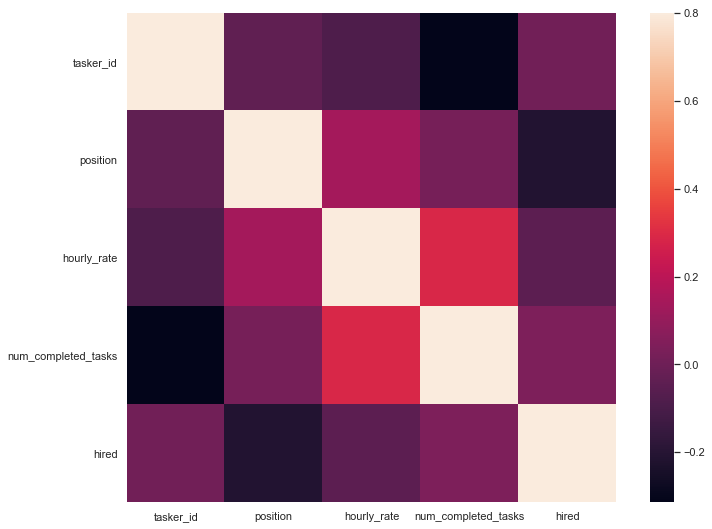

In [461]:
# Make the correlation matrix.
corrmat = df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.


It seems like hourly_rate and num_completed_tasks are more related to each other from above correlation matrix

In [462]:
tf=df.groupby(['hourly_rate', 'num_completed_tasks']).sum().sort_values([('num_completed_tasks')],ascending=False)

In [463]:
tf.head()

tasker_id  position  hired
hourly_rate num_completed_tasks                             
58          1406                 1008782548        11      0
            1403                 1008782548        13      0
            1398                 6052695288        60      0
            1397                 2017565096        25      1
45          1396                 2017565096        20      0

In [464]:
df_temp = (tf[tf['hired'] == 1]).sort_values([('num_completed_tasks')],ascending=False)

In [465]:
df1 = df_temp.loc[:, 'hourly_rate':'num_completed_tasks']

In [466]:
df1.iloc [0:5, 1:]

,
hourly_rate,num_completed_tasks
58,1397
75,1339
60,1221
150,1173
50,1165


 It does not look like the one who got most tasks to complete was charging very less hourly rate compared to others

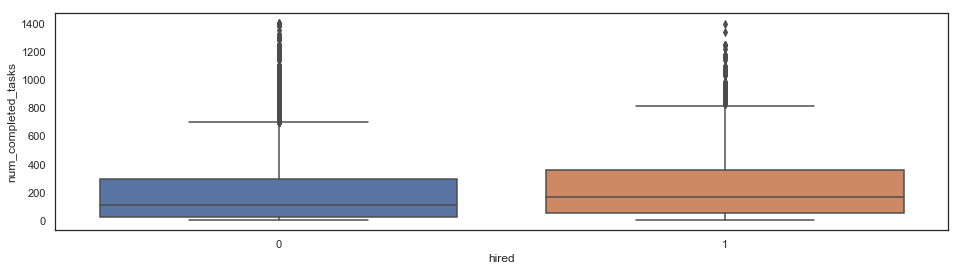

In [467]:
plt.figure(figsize=(16,4))
sns.boxplot(x="hired", y="num_completed_tasks", data=df)

It seems like there are more outliers in num_completed_tasks column for not hired taskers compared to hired ones 

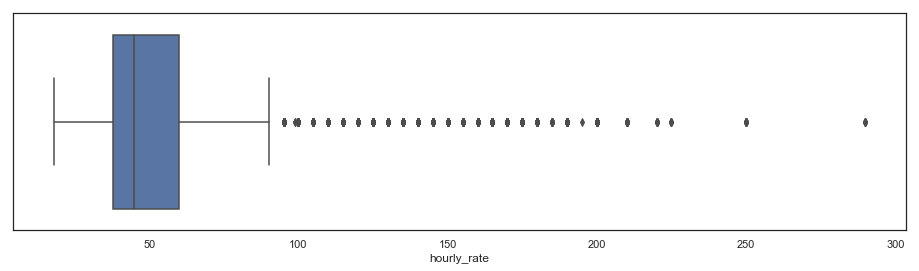

In [468]:
plt.figure(figsize=(16,4))
sns.boxplot(x="hourly_rate", data=df)

There are more outliers in hourly_rate column above around 90. Most hourly rate for tasker is below 100

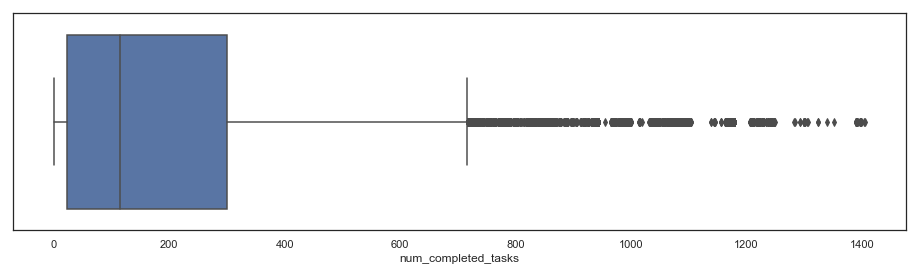

In [469]:
plt.figure(figsize=(16,4))
sns.boxplot(x="num_completed_tasks", data=df)

There are more outliers in num_completed_tasks after around 750 so most data for num_completed_tasks is below 750 

In [470]:
df.category.unique()

array(['Furniture Assembly', 'Moving Help', 'Mounting'], dtype=object)

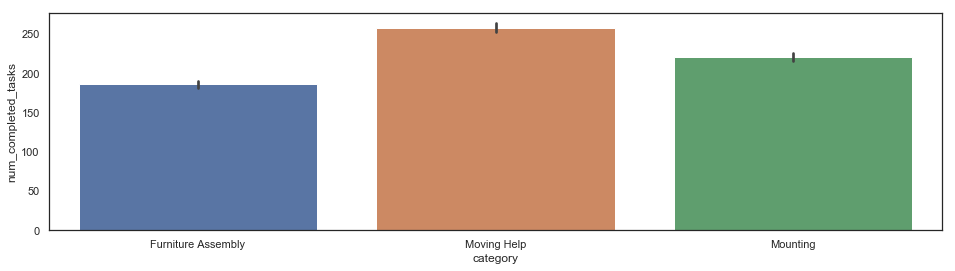

In [471]:
plt.figure(figsize=(16,4))
ax = sns.barplot(x="category", y="num_completed_tasks", data=df)

There are more tasks performed for category 'Moving Help' compared to others

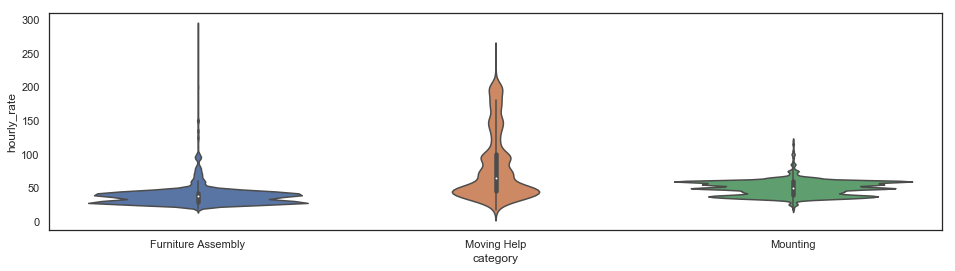

In [472]:
plt.figure(figsize=(16,4))
ax = sns.violinplot(x="category", y="hourly_rate", data=df)

As we know that more tasks are for category 'Moving Help' but most outliers in hourly rate are for 'Furniture Assembly' category

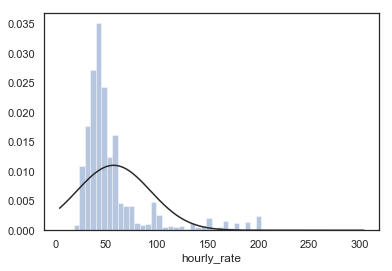

In [473]:
ax = sns.distplot(df['hourly_rate'], fit=norm, kde=False)

The above graph tells us that hourly rate is not normally distributed

#### Conclusions after overall data analysis :

- It seems like hourly_rate and num_completed_tasks are more related to each other from above correlation matrix
- It does not look like the one who got most tasks to complete was charging very less hourly rate compared to others
- It seems like there are more outliers in num_completed_tasks column for not hired taskers compared to hired ones
- There are more outliers in hourly_rate column above around 90. Most hourly rate for tasker is below 100
- There are more outliers in num_completed_tasks after around 750 so most data for num_completed_tasks is below 750
- There are more tasks performed for category 'Moving Help' compared to others
- As we know that more tasks are assigned for category 'Moving Help' but most outliers in hourly rate are for 'Furniture Assembly' category

## Data Modeling

In [474]:
df.head()

,recommendation_id,created_at,tasker_id,position,hourly_rate,num_completed_tasks,hired,category
0,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1009185352,1,38,151,0,Furniture Assembly
1,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1006892359,2,40,193,0,Furniture Assembly
2,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1012023956,3,28,0,0,Furniture Assembly
3,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1009733517,4,43,303,0,Furniture Assembly
4,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,1013579273,5,29,39,0,Furniture Assembly


As the ranking position is out of the Tasker’s control and it does not help to conclude any meaningful outcome we can drop it as its independent variable so dropping that column will not have any effect on our analysis. Similarly both recommendation_id and created_at columns can be dropped as well as they may not be informative for analysis

In [475]:
df_data = df.drop(['recommendation_id', 'position','created_at'], axis=1)

In [476]:
df_data.head()

,tasker_id,hourly_rate,num_completed_tasks,hired,category
0,1009185352,38,151,0,Furniture Assembly
1,1006892359,40,193,0,Furniture Assembly
2,1012023956,28,0,0,Furniture Assembly
3,1009733517,43,303,0,Furniture Assembly
4,1013579273,29,39,0,Furniture Assembly


we want to use market data to build a model that suggests hourly rates to Taskers that would maximize their opportunity to be hired so lets take data where taskers are hired

In [477]:
df_data.shape

(30000, 5)

In [478]:
df_data = df_data[df_data['hired'] == 1]

In [479]:
df_data.shape

(1705, 5)

As there are outliers in both hourly_rate and num_completed_tasks data, we have to remove those outliers to avoid overfitting so lets remove those outliers to get better performance

In [480]:
df_data = df_data[df_data['hourly_rate'] < 100]

In [481]:
df_data = df_data[df_data['num_completed_tasks'] < 800]

As 'category' column here is categorial variable so we have convert it to zero and ones for performing predictive modeling. So lets use pandas get_dummies to achieve this as below

In [482]:
dummy = pd.get_dummies(df_data['category'])
dummy.head()

,Furniture Assembly,Mounting,Moving Help
32,0,0,1
81,1,0,0
94,1,0,0
102,1,0,0
117,1,0,0


In [483]:
df_data = pd.concat([df_data, dummy], axis=1)
df_data.head()

,tasker_id,hourly_rate,num_completed_tasks,hired,category,Furniture Assembly,Mounting,Moving Help
32,1011985968,32,0,1,Moving Help,0,0,1
81,1009072269,35,59,1,Furniture Assembly,1,0,0
94,1009072269,35,59,1,Furniture Assembly,1,0,0
102,1007081910,42,353,1,Furniture Assembly,1,0,0
117,1007081910,42,353,1,Furniture Assembly,1,0,0


In [484]:
df_data = df_data.drop(['category'], axis=1)

In [485]:
df_data.head()

,tasker_id,hourly_rate,num_completed_tasks,hired,Furniture Assembly,Mounting,Moving Help
32,1011985968,32,0,1,0,0,1
81,1009072269,35,59,1,1,0,0
94,1009072269,35,59,1,1,0,0
102,1007081910,42,353,1,1,0,0
117,1007081910,42,353,1,1,0,0


In [486]:
## Create datasets
model_data = df_data.copy()
X = model_data.drop(['hourly_rate'], axis=1)
y = model_data.hourly_rate

# Split training testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [487]:
X_train.shape

(1134, 6)

In [488]:
## Run all the classification models
Regressors = [
    LinearRegression(),
    RandomForestRegressor(random_state=3),
    GradientBoostingRegressor(random_state=3),
    KNeighborsRegressor(), 
    LinearSVR(random_state=3),
    XGBRegressor(random_state=3)
]

names = []
scores = []

for reg in Regressors:
    reg = reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    names.append(reg.__class__.__name__)
    scores.append(reg.score(X_test, y_test))

score_df = pd.DataFrame({'Model': names, 'Score': scores}).set_index('Model')
score_df.sort_values(by='Score', ascending=False)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Score
Model,
RandomForestRegressor,0.902236
GradientBoostingRegressor,0.755503
XGBRegressor,0.742420
KNeighborsRegressor,0.648797
LinearRegression,0.369185
LinearSVR,-10.858511


### Model Tunning

#### XGBRegressor

In [489]:
# A parameter grid for XGBoost
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch
xgb = XGBRegressor(nthread=-1) 

grid = GridSearchCV(xgb, params)
grid.fit(X, y)

# Print the r2 score
print(r2_score(y_test, grid.best_estimator_.predict(X_test)))

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8955864642872818


In [490]:
grid.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.3,
 'max_depth': 4,
 'min_child_weight': 5,
 'subsample': 0.7}

In [491]:
cross_val_score(grid.best_estimator_, X_train, y_train, cv=5)

array([0.6974239 , 0.69905176, 0.76959565, 0.7347315 , 0.73408891])

#### GradientBoostingRegressor

In [492]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)

print('\nR-squared:')
print(gbr.score(X_test, y_test))


R-squared:
0.5071487896080529


In [493]:
cross_val_score(gbr, X_train, y_train, cv=5)

array([0.42805695, 0.44541479, 0.42989073, 0.49219064, 0.42623876])

#### RandomForestRegressor

In [494]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
print('\nR-squared:')
print(regr.score(X_test, y_test))


R-squared:
0.9159664111115615


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [495]:
cross_val_score(regr, X_train, y_train, cv=5)

array([0.78759287, 0.81068572, 0.85452157, 0.83445531, 0.76391275])

In [496]:
print(regr.feature_importances_)

[0.31187447 0.45128152 0.         0.19019643 0.03136195 0.01528562]


### Conclusion

- RandomForestRegressor is winner giving best performace compared to others
- Cross validation score also suggests there is no overfitting for RandomForestRegressor